# <h1 style='background:#05BFDB; border:0; color:purple'><center>CREDIT CARD FRAUD DETECTION</center></h1> 
<p align="center">
  <img width=800px height=500px src="https://pbs.twimg.com/media/FhgIfpYUUAAl3qN.jpg">
</p>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#05BFDB; border:0; color:purple'><center>TABLE OF CONTENTS</center></h1>

[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)  

[3. DATA CONTENT](#3)

[4. EXPLORATORY DATA ANALYSIS](#4)

[5. DATA VISUALIZATION](#5)

[6. OUTLIER DETECTION](#6)

[7. DATA PREPROCESSING](#7)

[8. MODEL TRAINING AND EVALUATING](#8)

[9. FEATURE IMPORTANCE](#9)

[10. AUC-ROC CURVE](#10)

[11. MODEL TUNING](#11)

[12. CONCLUSION](#12)






 <a id="1"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>LIBRARIES</center></h1> 

In [181]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id="2"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>LOADING DATASET</center></h1>

In [182]:
data=pd.read_csv('diabetes.csv')
df=data.copy()
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
6,3,78,50,32,88,31.00,0.25,26,1
7,10,115,0,0,0,35.30,0.13,29,0
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1


<a id="3"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>DATA CONTENT</center></h1>

* [Pregnancies: Number of times pregnant](#pregnancies)

* [Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test](#glucose)

* [BloodPressure: Diastolic blood pressure (mm Hg)](#bloodpressure)

* [SkinThickness: Triceps skin fold thickness (mm)](#skinthickness)

* [Insulin: 2-Hour serum insulin (mu U/ml)](#insulin)

* [BMI: Body mass index (weight in kg/(height in m)^2)](#bmi)

* [DiabetesPedigreeFunction: Diabetes pedigree function](#diabetespedigreefunction)

* [Age: Age (years)](#age)

* [Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0](#outcome)


<a id="4"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>EXPLORATORY DATA ANALYSIS</center></h1>

In [183]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


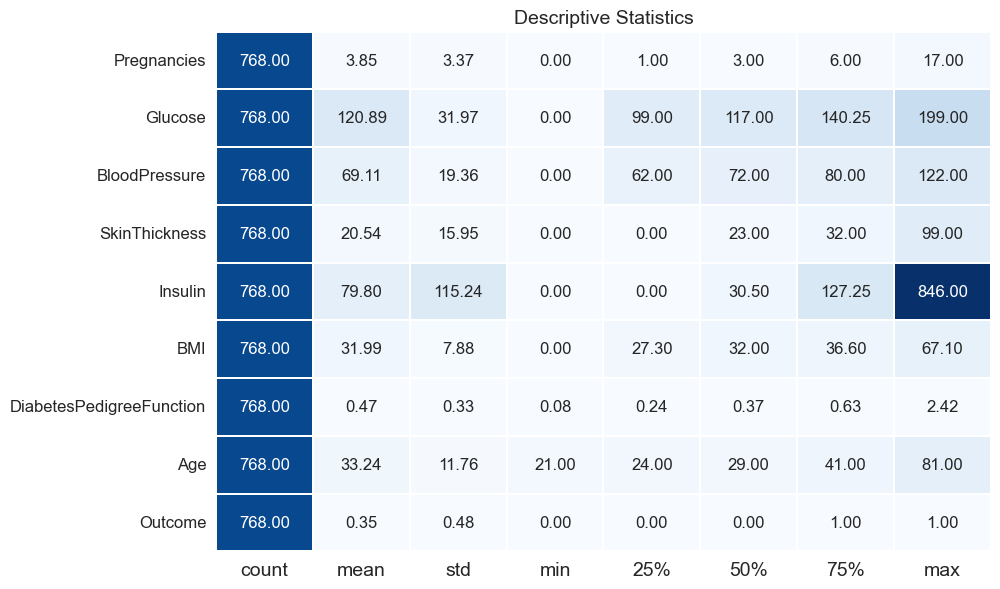

In [184]:
# describe the data
cols=df.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [185]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Pregnancies[int64],Mean (sd) : 3.8 (3.4)min < med < max:0.0 < 3.0 < 17.0IQR (CV) : 5.0 (1.1),17 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiklEQVR4nO3dTW7aQBiA4W9KAPNTWwgJdlygUhcsfYgettvusuAE3IANQkJghBMHY9xNqSqVBPCEMN/kfdaZMYtXQWPPYFOWpQCu+3LvDwBc4uHcHxhjWiLSqDj/rizL54pjgb/eDNUY0+r3+z/CMOxVmXyz2ayMMT+JFbbO/UdthGHYi+P4OYqi7JqJkyQJJpNJb7lcNkSEUGHl7Fe/iEgURdlgMHiqMH+rwhjgPyymoAKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSocNF+1KqKoqiLSGiMqToFR1kgIjcMNU3Tep7n30ejUa1Wq111OuCIoyw4ulmou93uIQiC9ng8zobD4era8Rxlwb9u+tUvItLpdKoeYxHhKAv+YDEFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSrc/BGqDcvdV+y88oizodruvmLnlV+cDdVm9xU7r/zjbKhHFruv2HnlERZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKjg/A3/e+FlxW4h1BN4WbF7CPU0XlbsGEJ9Ay8rdgeLKahAqFCBUKECoUIFbxdTluetwsPhUL/TtbkHe4KXodqet8rzPCiK4luWZY8ictWqn7Net+FlqLa/dj2bzXrT6bS93+9rH3lt7sG+zstQj6qet1qtVtb3QTnr9b5YTEEFQoUKhAoVCBUqECpU8HrV/xn5uuGbUD3i84ZvQnWM7aPfbrc7iON449uGb0J1yHs9+m02m4++PWwgVIfc89GviNuvrb8o1CRJgmsn3m63gYhImqbBYrFof+R4rdc+jrVV5drz+fyr7Wvr1+v11hjzS0SqjH8py/LVcb8BIYduc82dKcAAAAAASUVORK5CYII="">",0(0.0%)
2,Glucose[int64],Mean (sd) : 120.9 (32.0)min < med < max:0.0 < 117.0 < 199.0IQR (CV) : 41.2 (3.8),136 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrElEQVR4nO3dMY7aQBSA4TdhITZEtoAEOi4QiYKSPm0OmyOkoEhDww3oEBYywsHBGFJtlI02S/DY2nmT/6vX2MW/rOx94zHX61UA17157QsA/sXDa1+Aj4wxoYh0Kh5+ul6vxzqvxweEWjNjTDgcDj9HUdSvcvx+v98ZY74Q61OEWr9OFEX9+Xx+jOM4v+fANE2DxWLRT5KkIyKE+htCbUgcx/loNPpe4dCw9ovxADdTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIF/tfvmLIs2yISGWOqfoSXY4KE6pAsy9pFUUwnk0mr1WrdNXn1yNcxQUJ1yOl0egiCoDubzfLxeLy793ifxwQJ9S8spvSjy+XStjl3r9erOiIo4umYIKE+w2ZKvyiKoCzLj3mefxWRqrHhD4T6vMpT+uv1ur9arbrn87nV1MX9jwj1BVWm9He7nZd/el8bz1GhAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjAPKpnLFexOruClVA9YruK1eUVrITqEZtVrK6vYCVUD1msYnV2GQ03U1CBUKECoUIFQoUKhAoVCBUqECpUIFSowAN//OLy264JFSLi/tuuCRUi4v7brgkVT9i87bosy0gaGjEkVNSi6RFDQkUtmh4xJFTUqqkRQ56jQgVvv1Ettt8RqWELHtTLy1Bttt8RYQseF3kZqlhsvyPCFjwu8jVUEam2/Y4IW/C4iJspqECoUIFQoQKhQoWbN1OWzyOdfZcRdHkxVNvnkbbziRa/JDyw98ytb9ROFEX96XQqYRj+uOeDj8fj2+Vy+SFJkvfGmH2FawsGg8GnOI7f3Xvg4wP77Xb7rcJ55XA4BCIiWZYFm82mq+FYzedO0zS49TM/AdKLX9Vn3NB6AAAAAElFTkSuQmCC"">",0(0.0%)
3,BloodPressure[int64],Mean (sd) : 69.1 (19.4)min < med < max:0.0 < 72.0 < 122.0IQR (CV) : 18.0 (3.6),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3du47aQBSA4TPhInOJLUCCjheIlILSfdo8bB4hBUVq3oAGISFkhHctjHGabJREm13swWLO8H/9LFP88u6wMx5TlqUArvtw7wkA12jfewI+Msb0RKRbc/ipLMvnW87HB4R6Y8aY3mQy+RqG4ajO+MPhsDfGfCPWvxHq7XXDMBzFcfwcRVFWZWCSJMFyuRztdruuiBDqHwi1IVEUZdPp9KnG0N7NJ+MBFlNQgSeqY4qi6IhIaIyp+yO8XIwRqkPSNO3kef55Pp+3Wq1Wpb9vX/i6GCNUh5xOp3YQBP3FYpHNZrN91fE+L8YI1UGDwaDuQkzE08UYiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKvB+1P+wuCsqvFwunVvP59ER6its7orK8zwoiuJTlmXfRaTuy3jxD0J9Xe27otbr9Wi1WvXP53Orqck9IkJ9Q527ovb7vZevJr83FlNQgSeqZyzvqXL2jipC9YjtPVUu31FFqB6xuafK9TuqCNVDFvdUObsQZDEFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXe/c+UxU53EYc3OUCXN0O12eku4vYmB+jy3hO19k531zc5QJerNqXU2en+i7ObHKALiymowDY//GZ5OkCkwcWzt6FaflvxcGfzbU8HiDS7ePYyVNtvKx7xbL7N6QCR5hfPTodq87aS4XA4jeP4UPXbCpHHPptvcTpAiqIIpaGDhVeFmiRJUPVTkyQJiqJoS/2JB+Px+EsURcOqA1+eiHme/xCRWr/GRETSNA22222/ypjj8RjcY+y9P3uz2Xxs8mDhT9+QRSk2QaFWAAAAAElFTkSuQmCC"">",0(0.0%)
4,SkinThickness[int64],Mean (sd) : 20.5 (16.0)min < med < max:0.0 < 23.0 < 99.0IQR (CV) : 32.0 (1.3),51 distinct values,"<img src = ""data:image/png;ba

In [186]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='winter_r').set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [187]:
# check for class imbalance
px.histogram(df, x='Outcome', color='Outcome', title='Class Imbalance', width=500, height=500,
             template='plotly_dark', color_discrete_sequence=['#F63366', '#00CC96'])

In [188]:
# top 10 highest number of pregnancies:

pr=df.sort_values(by="Pregnancies",ascending=False).head(10)
pr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.90,0.82,47,1
88,15,136,70,32,110,37.10,0.15,43,1
298,14,100,78,25,184,36.60,0.41,46,1
455,14,175,62,30,0,33.60,0.21,38,1
274,13,106,70,0,0,34.20,0.25,52,0
357,13,129,0,30,0,39.90,0.57,44,1
86,13,106,72,54,0,36.60,0.18,45,0
72,13,126,90,0,0,43.40,0.58,42,1
691,13,158,114,0,0,42.30,0.26,44,1
635,13,104,72,0,0,31.20,0.47,38,1


In [189]:
# check for missing values

def missing_values(dataframe):

    total = dataframe.isnull().sum().sort_values(ascending = False)
    percent = (dataframe.isnull().sum() / dataframe.isnull().count() * 100).sort_values(ascending = False)
    missing_values = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    print("Missing Values")
    display(missing_values.head(10))
missing_values(df)

Missing Values


,Total,Percent
Pregnancies,0,0.00
Glucose,0,0.00
BloodPressure,0,0.00
SkinThickness,0,0.00
Insulin,0,0.00
BMI,0,0.00
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,0,0.00


In [190]:
# filling zeros with nan values

def zerotonan(data):
    data['Glucose'] = data['Glucose'].replace(0, np.nan)
    data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
    data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
    data['Insulin'] = data['Insulin'].replace(0, np.nan)
    data['BMI'] = data['BMI'].replace(0, np.nan)
    return data

zerotonan(df)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,NaN,33.60,0.63,50,1
1,1,85.00,66.00,29.00,NaN,26.60,0.35,31,0
2,8,183.00,64.00,NaN,NaN,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


In [191]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [192]:
# filling nan values with simple imputer

from sklearn.impute import SimpleImputer

sp=SimpleImputer(missing_values=np.nan,strategy='mean')

for i in df.columns:
    df[i]=sp.fit_transform(df[i].values.reshape(-1,1))
    
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a id="5"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>DATA VISUALIZATION</center></h1>

In [193]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00,148.00,72.00,35.00,155.55,33.60,0.63,50.00,1.00
1,1.00,85.00,66.00,29.00,155.55,26.60,0.35,31.00,0.00
2,8.00,183.00,64.00,29.15,155.55,23.30,0.67,32.00,1.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0.00
4,0.00,137.00,40.00,35.00,168.00,43.10,2.29,33.00,1.00


In [194]:
# plotting numerical variables distribution:


colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']

num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

def num_summary(dataframe, col_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Quantiles','Distribution'))

    fig.add_trace(go.Histogram(x = dataframe[col_name],
                               xbins = dict(start = dataframe[col_name].min(),
                                            end = dataframe[col_name].max()),
                               showlegend = False,
                               name = str(col_name),
                               marker=dict(color=colors[8],
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 1)
    
    fig.add_trace(go.Box(y=dataframe[col_name],
                         name = str(col_name),
                         showlegend = False,
                         marker_color = colors[3]),
                  row = 1, col = 2)
    
    
  
    fig.update_layout(title = {'text': col_name,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark")
    
    iplot(fig)

for i in num_cols:
    num_summary(df,i)

Text(0.5, 1.0, 'Distribution of all Variables')

<Figure size 2000x2000 with 0 Axes>

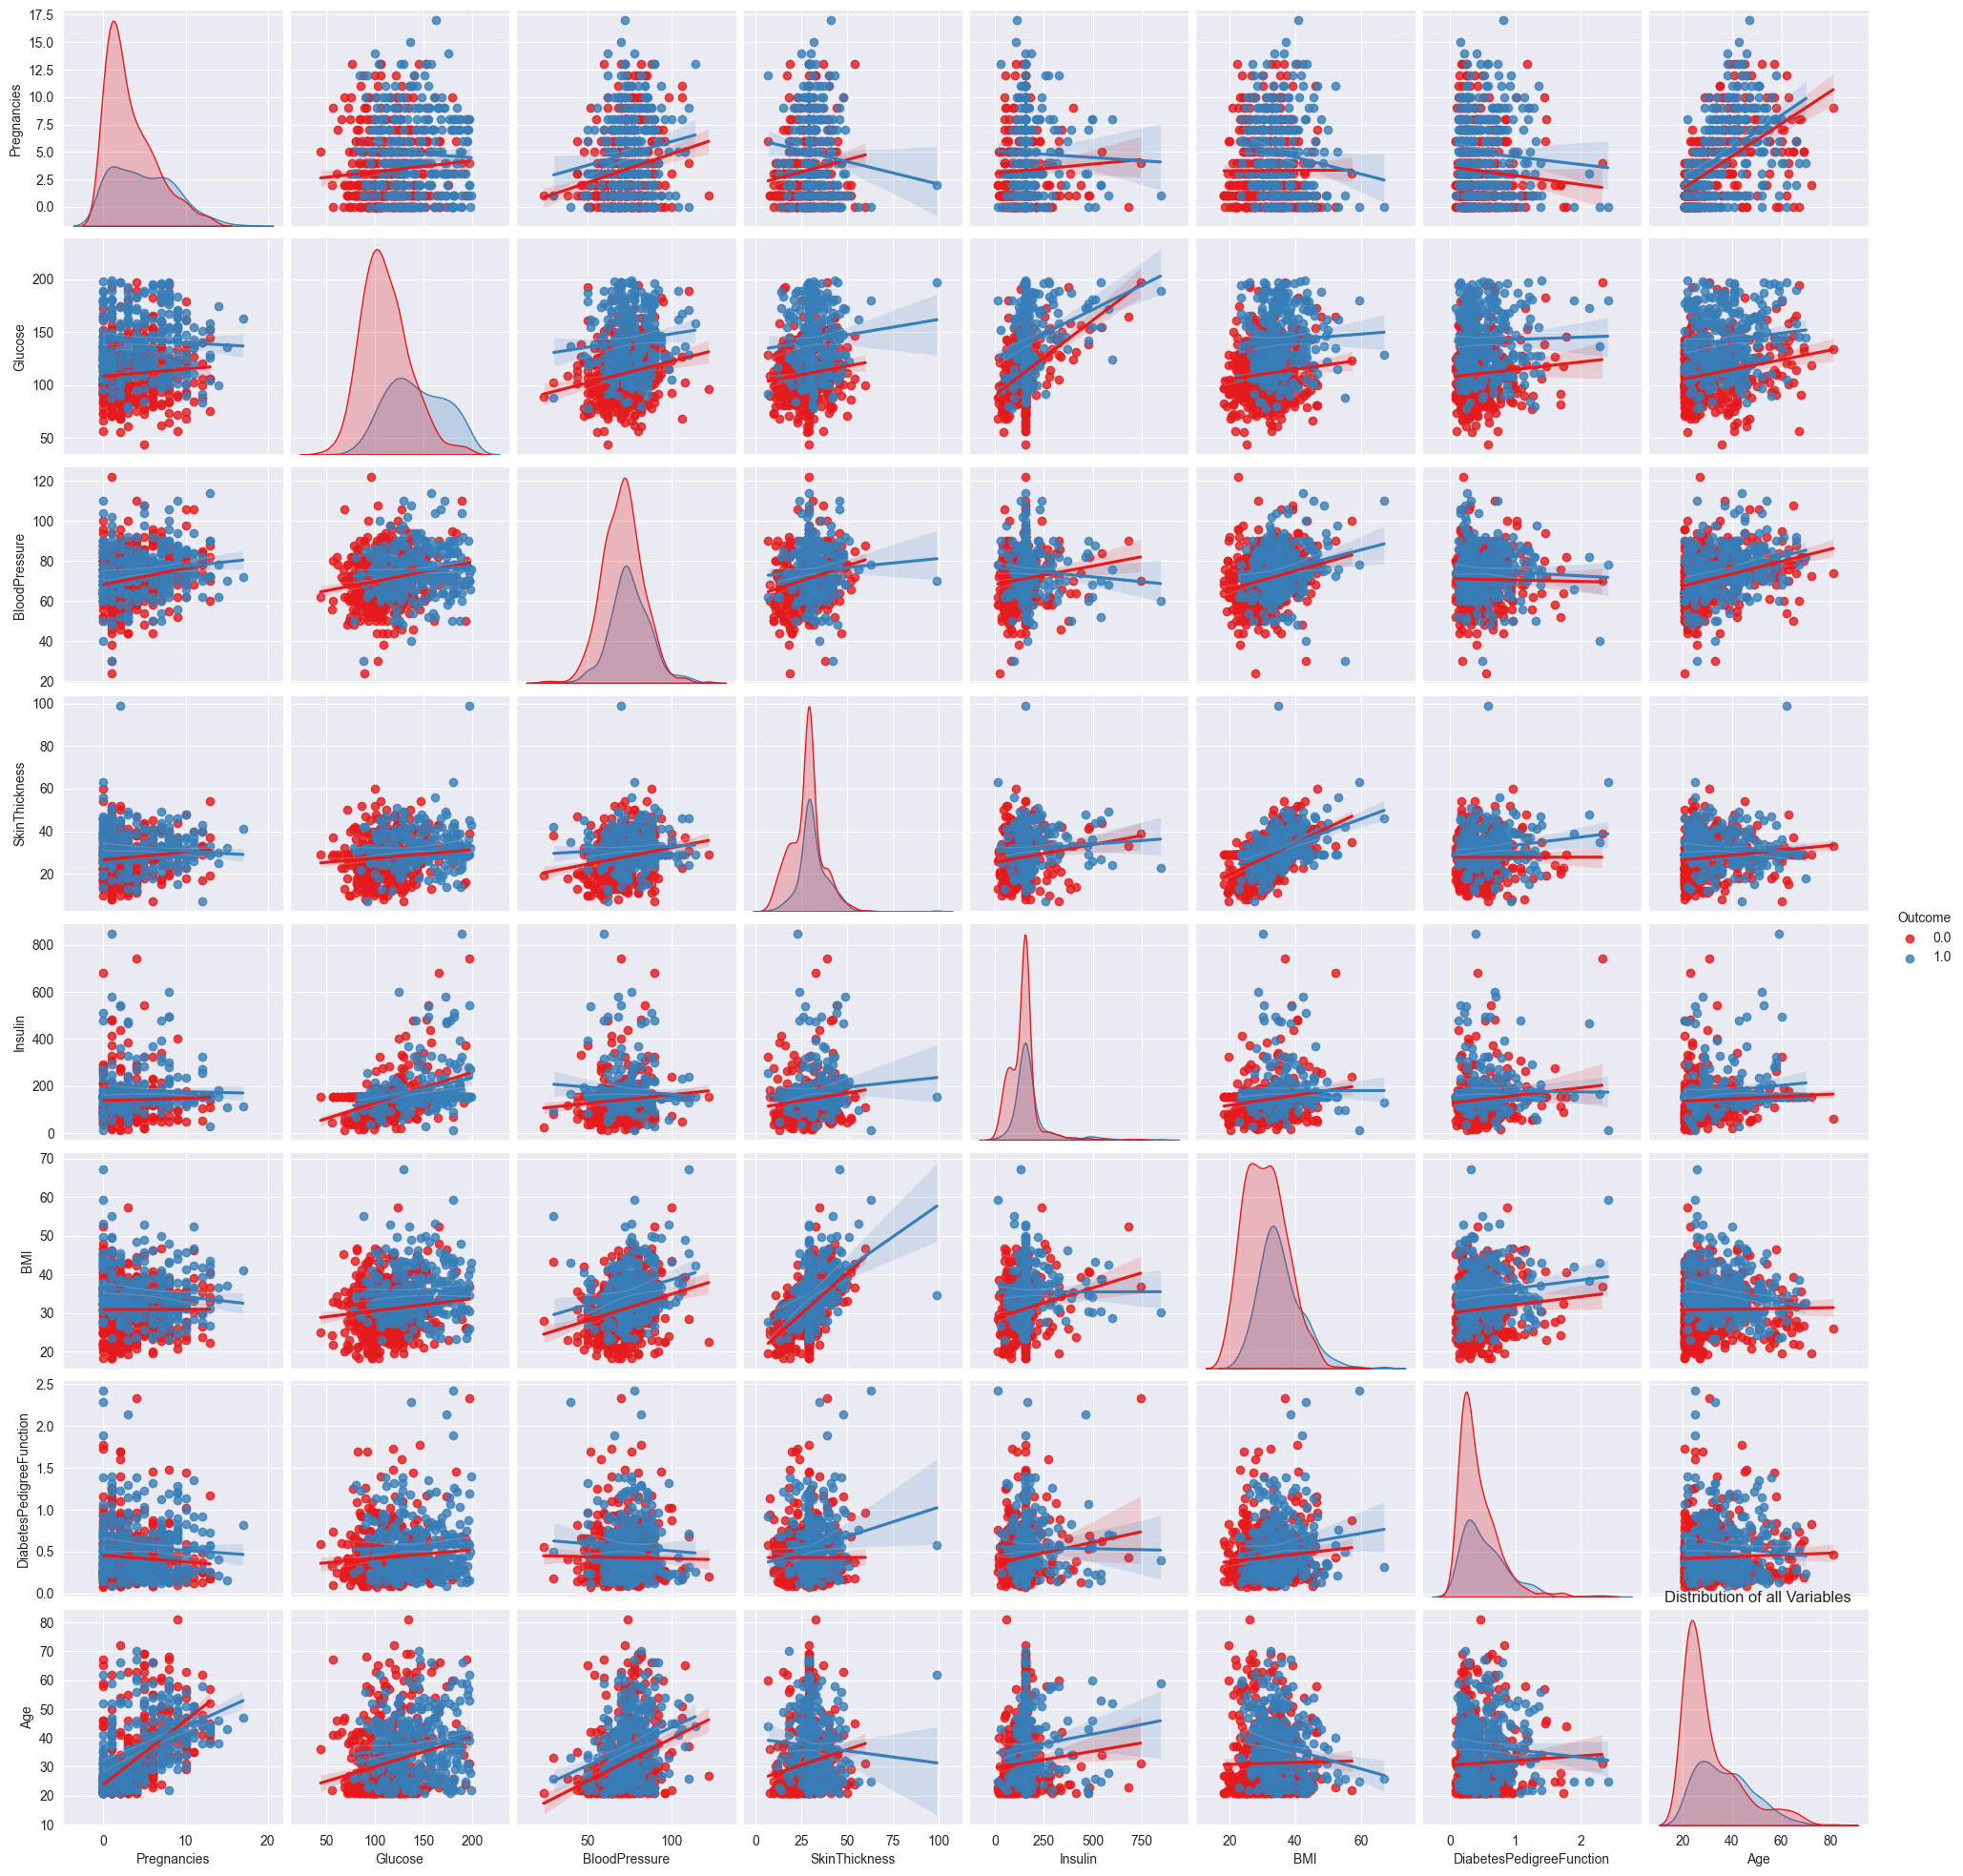

In [195]:
# distribution of all variables based on Sex:
plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
sns.pairplot(df,hue="Outcome",kind="reg",palette="Set1")
plt.title("Distribution of all Variables")

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 2000x1000 with 0 Axes>

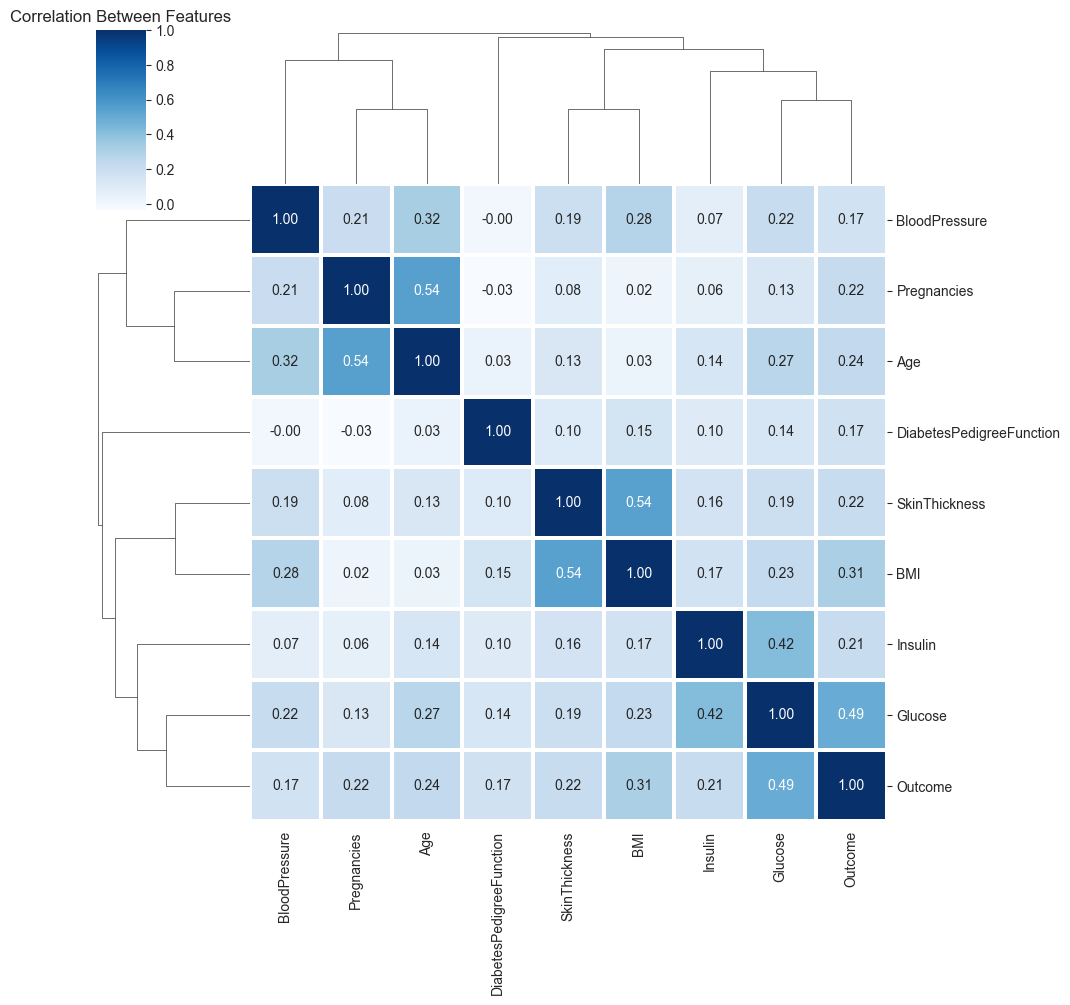

In [196]:
# correlation matrix:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.clustermap(corr,fmt=".2f",cmap="Blues",annot=True,linewidths=1.5,)
plt.title("Correlation Between Features")

<a id="6"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>OUTLIER DETECTION</center></h1>

In [197]:
df1=df.drop("Outcome",axis=1)

for i in df1.columns:
    fig=px.box(df1,y=i,color=df["Outcome"],title=i,width=500,height=500,template="plotly_dark")
    fig.show()

In [198]:
# removing outliers in BMI column

Q1=df["BMI"].quantile(0.25)
Q3=df["BMI"].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df=df[(df["BMI"]>lower_limit)&(df["BMI"]<upper_limit)]

px.box(df,y="BMI",color="Outcome",title="BMI",width=500,height=500,template="plotly_dark")

<a id="7"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>DATA PREPROCESSING</center></h1>

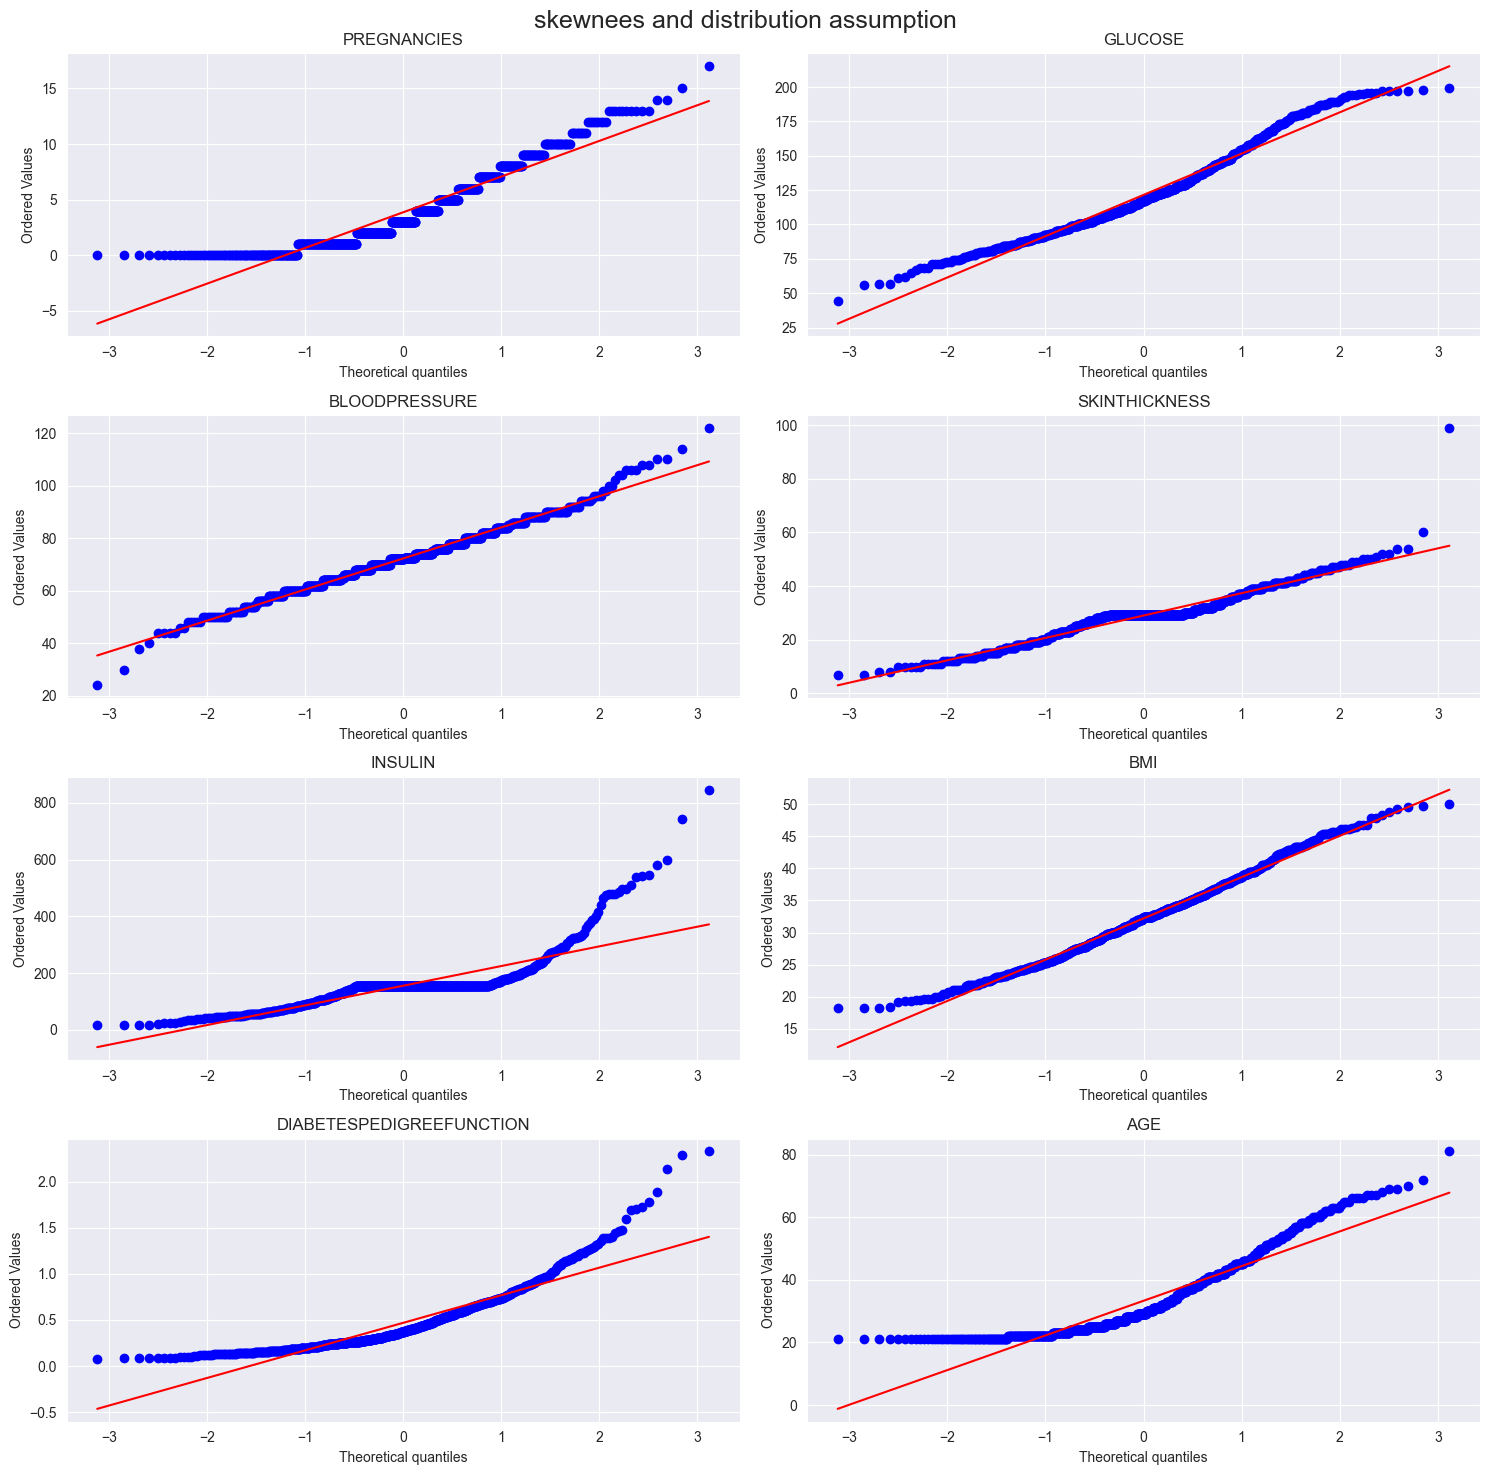

In [199]:
# Checking distribution assumption and skewness of numerical columns

c = 1  # initialize plot counter

fig = plt.figure(figsize = (15,15))
plt.suptitle("skewnees and distribution assumption", fontsize = 18)
df_nums=df.drop(['Outcome'],axis=1)

for i in df_nums.columns:
    plt.subplot(4, 2, c)
    plt.xlabel(i)       
    stats.probplot(df[i],dist="norm",plot=plt)
    plt.title(i.upper())
    c = c + 1

plt.tight_layout()
plt.show()

In [200]:
# check skewness of independent variables:

#if skewness is  greater than 1, the distribution has positive skewness.
#if skewness is  less than -1, the distribution has negative skewness.

df_ind=df.drop("Outcome",axis=1)    #independent variables

skew_features = df_ind.apply(lambda x: skew(x)).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' :skew_features})
skewness

# there is positive skewness in height variable,too. So, we will apply log transformation to make it normal.

,Skew
Insulin,2.96
DiabetesPedigreeFunction,1.80
Age,1.12
Pregnancies,0.90
SkinThickness,0.78
Glucose,0.54
BMI,0.25
BloodPressure,0.15


mean: 4.933567413398589 standart deviation = 0.5004650120961639


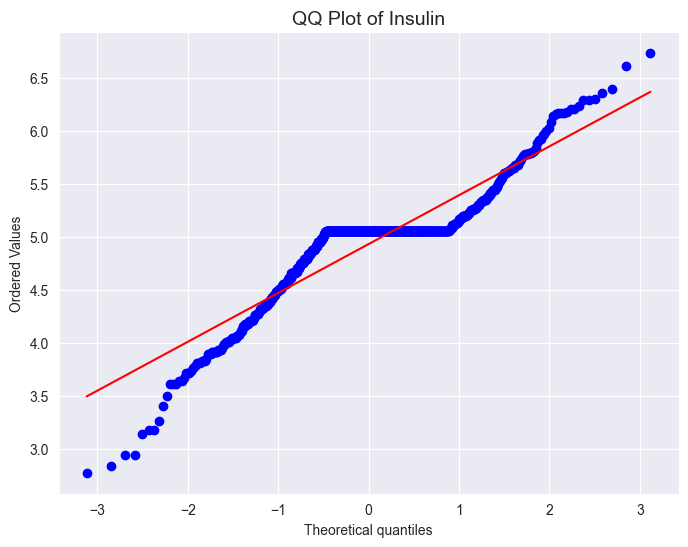

mean: 0.3637591356816758 standart deviation = 0.19640403187306857


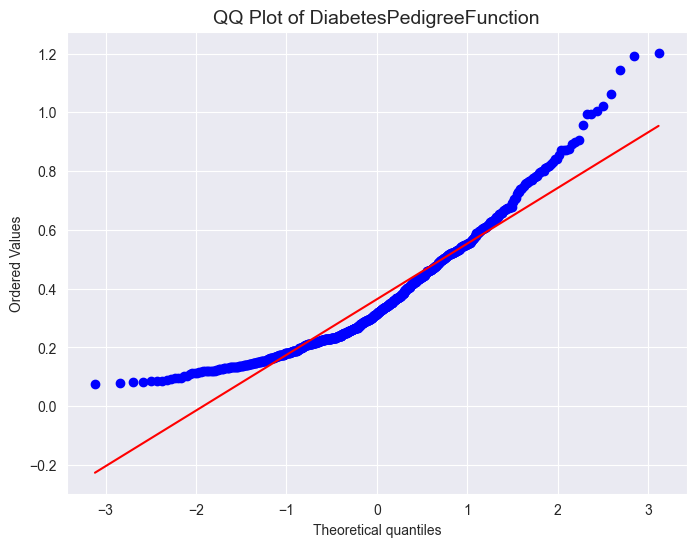

mean: 3.483350577825695 standart deviation = 0.3138623037363527


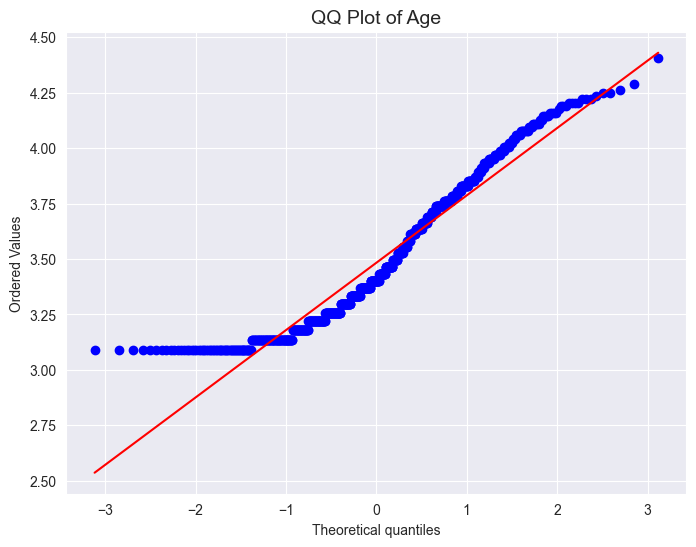

In [201]:
# applying log transformation to some columns:



cols=['Insulin','DiabetesPedigreeFunction','Age']

for i in cols:
    df[i]=np.log1p(df[i])
    
    (mu, sigma) = norm.fit(df[i]) #mu: mean, sigma: standard deviation
    print("mean: {} standart deviation = {}".format(mu, sigma))
    
    # QQ plot again:

    plt.figure(figsize = (8, 6))
    stats.probplot(df[i], plot = plt)
    plt.title("QQ Plot of "+i, size = 14)
    plt.show()




In [202]:
# check skewness of independent variables:
skew_features = df.apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skew_features})
skewness


,Skew
DiabetesPedigreeFunction,1.07
Pregnancies,0.90
SkinThickness,0.78
Outcome,0.65
Age,0.60
Glucose,0.54
BMI,0.25
BloodPressure,0.15
Insulin,-0.73


In [203]:
# STANDARDIZATION OF DATA:

sc=StandardScaler()

X =  pd.DataFrame(sc.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=df["Outcome"].values.reshape(-1,1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.64,0.87,-0.03,0.69,0.24,0.22,0.63,1.43
1,-0.85,-1.20,-0.53,-0.00,0.24,-0.87,-0.32,-0.06
2,1.23,2.02,-0.70,0.02,0.24,-1.38,0.77,0.04
3,-0.85,-1.07,-0.53,-0.70,-0.76,-0.64,-1.07,-1.25
4,-1.15,0.51,-2.72,0.69,0.39,1.69,4.21,0.14


In [204]:
# splitting data into train and test sets:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (608, 8)
X_test shape:  (152, 8)
y_train shape:  (608, 1)
y_test shape:  (152, 1)


<a id="8"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>MODEL TRAINING AND EVALUATING</center></h1>

In [205]:
# MODELING:

knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]
overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE","precision_score","recall_score"])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc=roc_auc_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    cv=cross_val_score(model,X,y,cv=10).mean()
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    rc=recall_score(y_test,y_pred)
    
    overral=overral.append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Blues")
overral
                        

,Model,Accuracy Score,F1 Score,ROC AUC Score,R2 Score,Cross Val Score,RMSE,MAE,MSE,precision_score,recall_score
9,LogisticRegression,0.782895,0.666667,0.742560,0.066964,0.764474,0.465946,0.217105,0.217105,0.767442,0.589286
8,AdaBoostClassifier,0.776316,0.679245,0.748512,0.038690,0.747368,0.472953,0.223684,0.223684,0.720000,0.642857
4,RandomForestClassifier,0.769737,0.653465,0.732143,0.010417,0.763158,0.479857,0.230263,0.230263,0.733333,0.589286
0,KNeighborsClassifier,0.763158,0.666667,0.738095,-0.017857,0.756579,0.486664,0.236842,0.236842,0.692308,0.642857
6,LGBMClassifier,0.763158,0.672727,0.741815,-0.017857,0.740789,0.486664,0.236842,0.236842,0.685185,0.660714
3,DecisionTreeClassifier,0.756579,0.660550,0.732887,-0.046131,0.710526,0.493377,0.243421,0.243421,0.679245,0.642857
5,XGBClassifier,0.756579,0.654206,0.729167,-0.046131,0.727632,0.493377,0.243421,0.243421,0.686275,0.625000
1,SVC,0.750000,0.604167,0.701637,-0.074405,0.750000,0.500000,0.250000,0.250000,0.725000,0.517857
7,GradientBoostingClassifier,0.750000,0.612245,0.705357,-0.074405,0.744737,0.500000,0.250000,0.250000,0.714286,0.535714
2,GaussianNB,0.730263,0.649573,0.719494,-0.159226,0.747368,0.519362,0.269737,0.269737,0.622951,0.678571


In [206]:
models = [knn,nb, dtc, rfc, xgb, lgb, gbc, abc, lr]
for model in models:
    
    print("Model: ",model.__class__.__name__)
    print("Classification Report: \n",classification_report(y_test,y_pred))
    fig=px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='Blues',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=600,height=600,template="plotly_dark")
    fig.show()
    print("----------------------------------------------------------")

Model:  KNeighborsClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  LGBMClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  AdaBoostClassifier
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        96
         1.0       0.77      0.59      0.67        56

    accuracy                           0.78       152
   macro avg       0.78      0.74      0.75       152
weighted avg       0.78      0.78      0.78       152



----------------------------------------------------------


* After evaluating 7 different models, I have decided to use LogisticRegression, AdaBoostClassifier, KNeighborsClassifier,
LGBMClassifier,RandomForestClassifier,XGBClassifier	,GradientBoostingClassifier	 because they have the highest accuracy scores and the highest AUC scores.



<a id="9"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>FEATURE IMPORTANCE</center></h1>

In [211]:
models = [rfc,lgb, gbc, abc,xgb]
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',"Age","BMI","DiabetesPedigreeFunction"]
for model in models:
    print("Model: ",model.__class__.__name__)
    tmp = pd.DataFrame({'Feature': features, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    fig=px.bar(tmp,x='Feature',y='Feature importance',color='Feature importance',title="Features importance of "+type(model).__name__,
                labels=dict(x="Feature",y="Feature importance",color="Feature importance"),color_continuous_midpoint=0.8,
                width=600,height=600,template="plotly_dark")

    fig.show()   

Model:  RandomForestClassifier


Model:  LGBMClassifier


Model:  GradientBoostingClassifier


Model:  AdaBoostClassifier


Model:  XGBClassifier


* I could not show KNN and Logistic Regression feature importance because they do not have feature importance attribute.

<a id="9"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>AUC-ROC CURVE</center></h1>

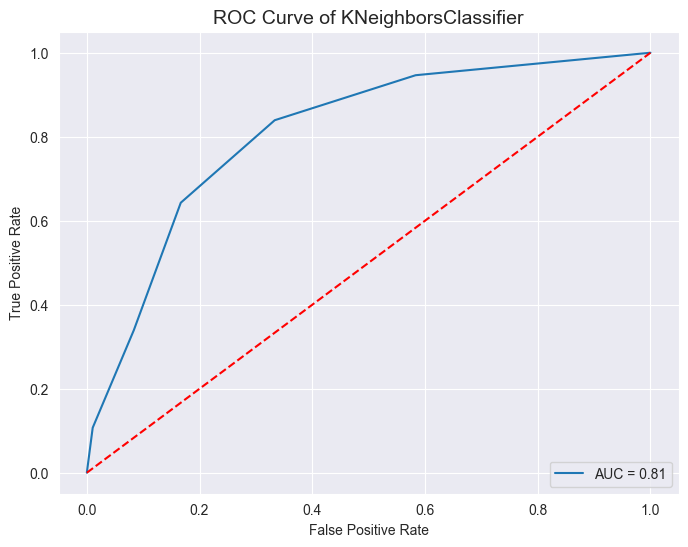

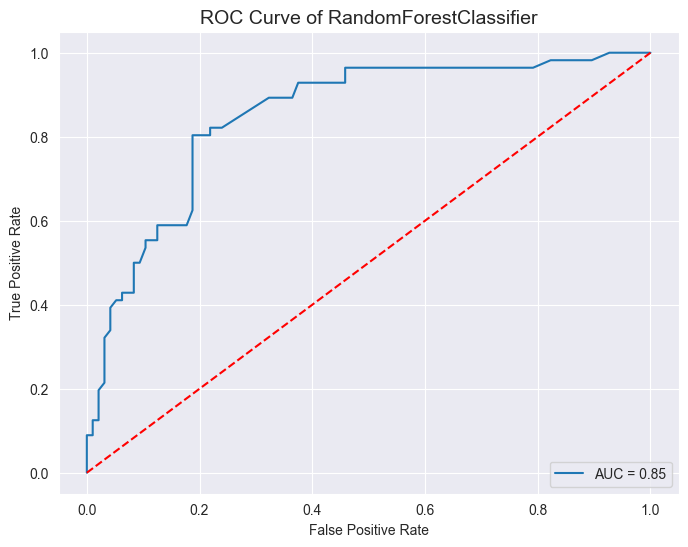

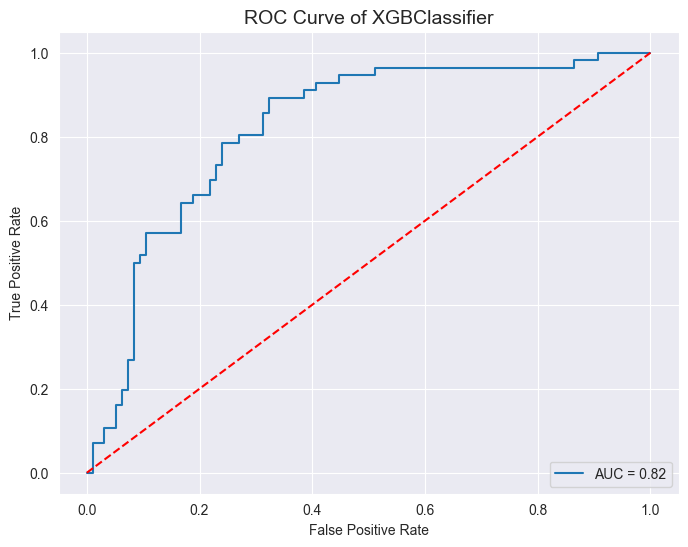

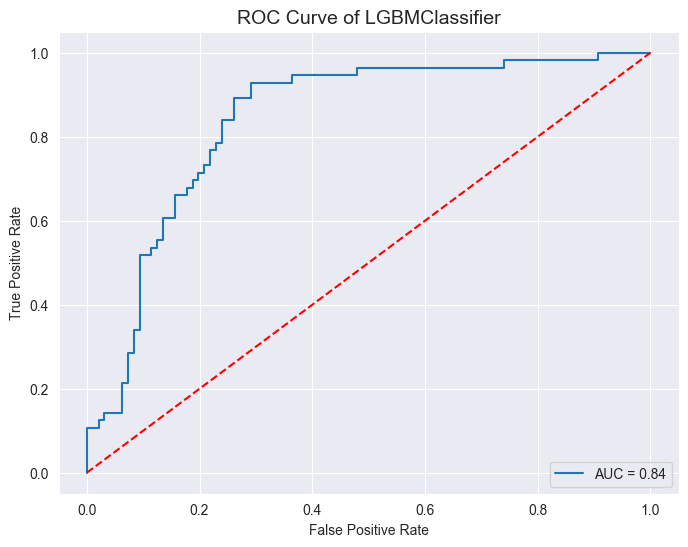

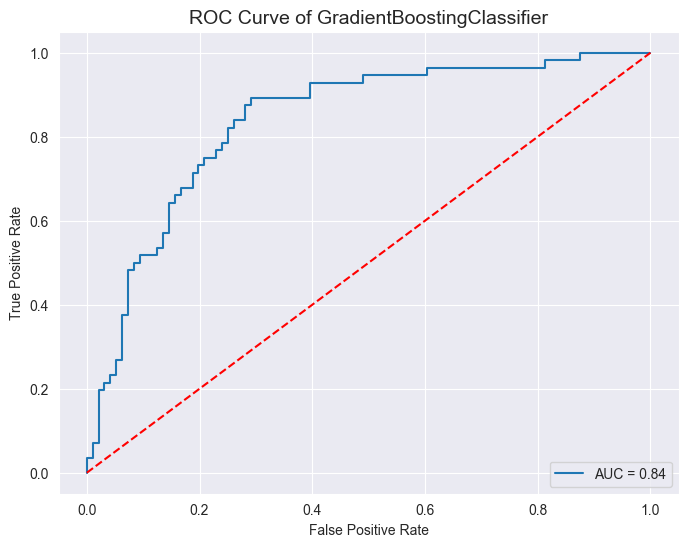

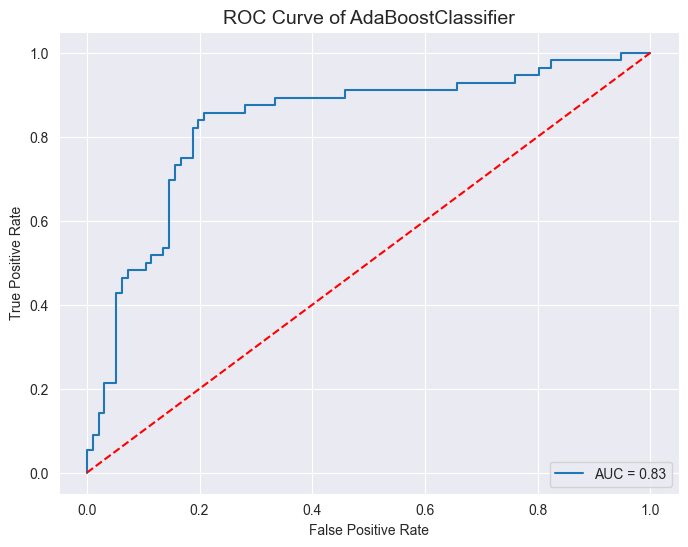

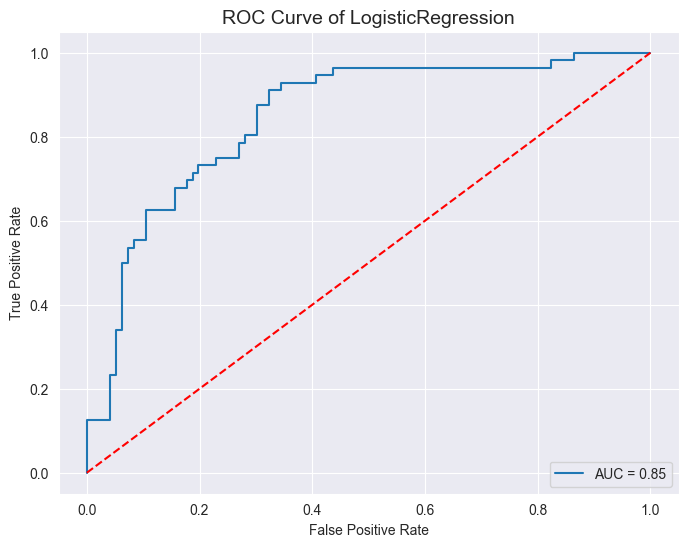

In [208]:
models = [knn,rfc, xgb, lgb, gbc, abc, lr]
for model in models:

    # ROC Curve:
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize = (8, 6))
    plt.plot(fpr, tpr, label = "AUC = %0.2f" % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc = 'lower right')
    plt.title("ROC Curve of "+model.__class__.__name__, size = 14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

* After evaluating 7 different models with ROC-AUC curve, I have decided to use LogisticRegression,
RandomForestClassifier,GradientBoostingClassifier and LGBMclassifier  because they have the highest AUC scores.

<a id="10"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>MODEL TUNING</center></h1>

In [209]:
log_params = {"C":np.logspace(-3,3,7),
             "penalty":["l1","l2"]} # l1 = lasso ve l2 = ridge

rand_params={"n_estimators":[100,500,1000],
            "max_depth":[3,5,8,10],
            "max_features":["auto","sqrt","log2",None],
            "bootstrap":[True,False],
            "criterion":["gini","entropy"]} 

grand_params={"n_estimators":[100,500,1000],
            "max_depth":[3,5,8,10],
            "max_features":["auto","sqrt","log2"],
            "learning_rate":[0.01,0.1,1],
            "loss":["deviance","exponential"]}

lgbm_params={"n_estimators":[100,500,1000],
            "max_depth":[3,5,8,10],
            "learning_rate":[0.01,0.1,1],
            "subsample":[0.5,0.7,1]}


params=[log_params,rand_params,grand_params,lgbm_params]
models = [lr,rfc,lgb, gbc]

for p,model in zip(params,models):
    gv=GridSearchCV(model,p,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
    print("Model: ",model.__class__.__name__)
    print("Best Parameters: ",gv.best_params_)
    print("Best Score: ",gv.best_score_)
    print("----------------------------------------------------------")

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Model:  LogisticRegression
Best Parameters:  {'C': 0.01, 'penalty': 'l2'}
Best Score:  0.7648633879781421
----------------------------------------------------------
Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Model:  RandomForestClassifier
Best Parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
Best Score:  0.7729508196721311
----------------------------------------------------------
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[LightGBM] [Warning] Unknown parameter: max_features
Model:  LGBMClassifier
Best Parameters:  {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
Best Score:  0.7647540983606558
----------------------------------------------------------
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Model:  GradientBoostingClassifier
Best

In [210]:
#final model

rfc=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=8,max_features='auto', n_estimators=500)
lr=LogisticRegression(C=0.01, penalty='l2')
lgb=LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=100, max_features="auto",loss="deviance",subsample=0.5)
gbc=GradientBoostingClassifier(learning_rate=0.01, max_depth=3, subsample=0.7, n_estimators=1000)


models = [rfc, lr, lgb, gbc]
overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE","precision_score","recall_score"])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc=roc_auc_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    cv=cross_val_score(model,X,y,cv=10).mean()
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    rc=recall_score(y_test,y_pred)
    
    overral=overral.append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    
    
overral=overral.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)
overral



[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


,Model,Accuracy Score,F1 Score,ROC AUC Score,R2 Score,Cross Val Score,RMSE,MAE,MSE,precision_score,recall_score
0,LGBMClassifier,0.78,0.64,0.73,0.04,0.75,0.47,0.22,0.22,0.79,0.54
1,GradientBoostingClassifier,0.77,0.66,0.74,0.01,0.76,0.48,0.23,0.23,0.72,0.61
2,LogisticRegression,0.76,0.62,0.71,-0.02,0.77,0.49,0.24,0.24,0.76,0.52
3,RandomForestClassifier,0.75,0.63,0.71,-0.07,0.76,0.50,0.25,0.25,0.70,0.57


* After model tuning I have decided to use GradientBoostingClassifier and LGBMclassifier because they have the highest metrics scores.

<a id="12"></a>
<h1 style='background:#05BFDB; border:0; color:purple'><center>CONCLUSION</center></h1>

* After I have done the Exploratory Data Analysis, I have found out that there are outliers in the dataset. I have used the IQR method to fill the outliers with median. And then I have done data visualization to get insight from data. After that I have built Classification models and trained them. After model tuning , I got %78.00 accuracy score from LGBMclassifier.